<a href="https://colab.research.google.com/github/yyoshiaki/2019SpringCamp_GP/blob/master/sampling_g_and_gp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#正規分布からサンプリング〜ガウス過程からサンプリング


*   単変量正規分布からの標本生成（サンプリング）
*   多変量正規分布からのサンプリング、
*   ガウス過程からのサンプリング


参考：https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.multivariate_normal.html

In [0]:
import numpy as np
import matplotlib.pyplot as plt

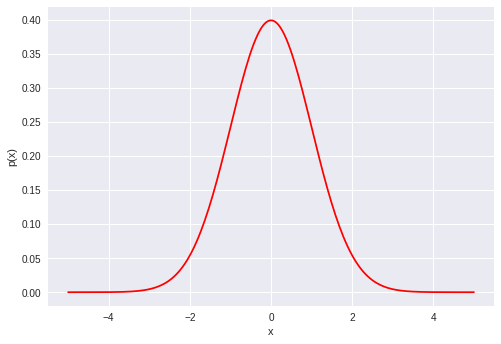

In [0]:
# 標準正規分布の密度関数を描画

N = 200
x = np.linspace(-5,5,N)
y = (1/np.sqrt(2*np.pi)) * np.exp(-(1/2)*x*x)
plt.plot(x,y,'r-')
plt.xlabel('x')
plt.ylabel('p(x)')

N=200

Text(0, 0.5, 'freq')

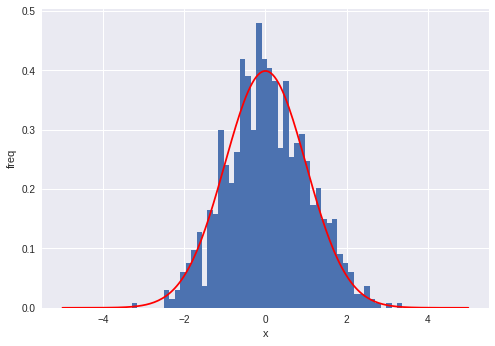

In [0]:
# 標準正規分布からのサンプリングを行い、ヒストグラムを描画
# 【実習】 サンプルサイズをいろいろ変えながら実行してみましょう

N = 1000
x_sample = np.random.normal(size=N)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(x_sample, bins=50, density=True)
ax.plot(x,y,'r-')
ax.set_xlabel('x')
ax.set_ylabel('freq')


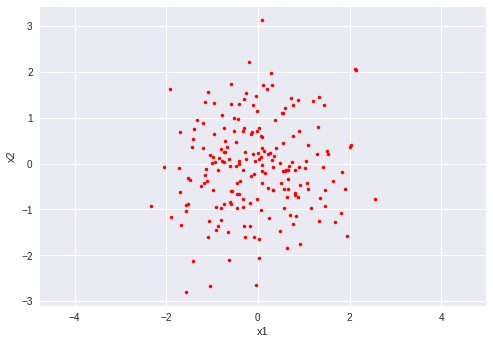

In [0]:
# 2次元正規分布からのサンプリング
# 【実習】 サンプルサイズをいろいろ変えながら実行してみましょう

N = 200
x1_sample = np.random.normal(size=N)
x2_sample = np.random.normal(size=N)
plt.plot(x1_sample,x2_sample,'r.')
plt.axis('equal')
plt.xlabel('x1')
plt.ylabel('x2')
N=200

(-2.817586212146226,
 3.7151632992090957,
 -2.4764195278900543,
 3.1250607119908027)

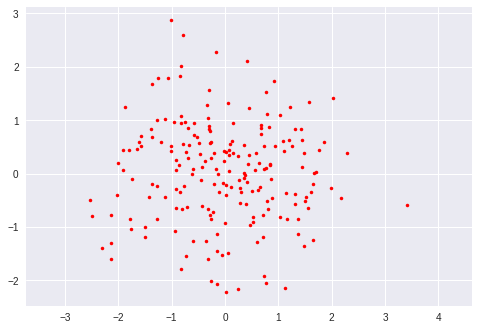

In [0]:
# 2次元正規分布からのサンプリング（2次元ぶんをまとめてサンプリング）

N = 200
x_sample = np.random.normal(size=(2,N))  # これでもOK

plt.plot(x_sample[0,:],x_sample[1,:],'r.')
plt.axis('equal')


p1=[[0.89442719]
 [0.4472136 ]]
p2=[[-0.4472136 ]
 [ 0.89442719]]
P=[[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]
D=[[2 0]
 [0 1]]
C=[[3.4 1.2]
 [1.2 1.6]]


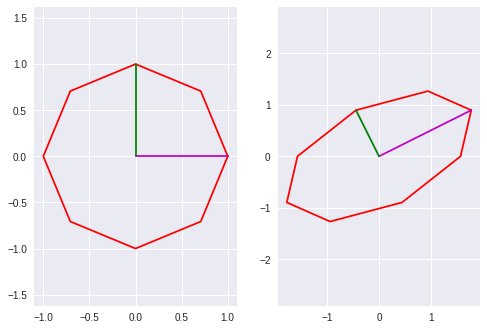

In [0]:
# 共分散行列の構造
# 固有値と固有ベクトルから共分散行列を作ってみます。
# Σ = P Γ P' = P D D P'
# 

# (1) 互いに直交する２つの固有ベクトルを作ります。ノルムが 1.0 になるようにしておきます。
p1 = np.array([[2],[1]]) / np.sqrt( 2*2 + 1 )  # 方向ベクトル1 （ノルム=1.0）
p2 = np.array([[-1],[2]]) / np.sqrt( 2*2 + 1) # 方向ベクトル2 （ノルム=1.0）
P = np.concatenate( (p1,p2), axis=1 )  # 縦ベクトルを横方向(axis=1方向)に2つ並べた行列
print('p1={}'.format(p1))
print('p2={}'.format(p2))
print('P={}'.format(P))

# (2) 共分散行列 C = P D D P' を作ります
# 【実習】　対角行列 D の対角成分の値を変えて実験してみましょう
sigma1 = 2
sigma2 = 1

D = np.diag( np.array([sigma1,sigma2]))
C = np.dot( np.dot(P,D*D), P.T )
print('D={}'.format(D))
print('C={}'.format(C))

# (3) 共分散行列 C に対応する線形変換行列 P D を用いて図形の線形変換をしてみます

# NN=2 のとき cx[0, i], cx[1,i] , i = 0,...,(NN*4) は原点を中心とした8角形の頂点
# 第0頂点     ( cx[0,0], cx[1,0] )      =  (1,0) と、
# 第NN頂点 　( cx[0,NN], cx[1,NN] ) =  (0,1) に着目。

# NN の値を 90 にすると正360角形（ぼぼ円）を描くことができます
NN = 2
t = np.linspace(0,1,NN*4+1)*np.pi*2
cx = np.array( [np.cos(t),np.sin(t)])


def plot_a(ax, x, n):
    ax.axis('equal')
    # 正（NN*4）角形
    ax.plot( x[0,:],x[1,:],'r-')
    # 原点と第0頂点を結ぶマゼンタ色の線
    ax.plot( [0,x[0,0]],[0,x[1,0]],'m-')
    # 原点と第n頂点を結ぶ緑色の線
    ax.plot( [0,x[0,n]],[0,x[1,n]],'g-')

# 左側パネルに正（NN*4）角形を描画
ax1 = plt.subplot(1,2,1)
plot_a(ax1 ,cx ,NN)

# 右側パネルに一次変換  cx2 = P * D * cx  の結果を描画
ax2 = plt.subplot(1,2,2)
cx2 = np.dot( np.dot( P, D ),  cx )
plot_a(ax2, cx2, NN)


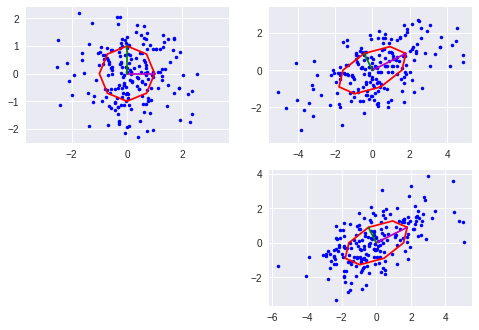

In [0]:
# (4) 図形の線形変換を使って、正規分布の散布図を変形します

N=200
#
mu = np.array([0,0])
cov=np.array([[1,0],[0,1]])
cov2 = np.dot( np.dot( P, D*D ), P.T )

# 標準正規分布をサンプリング
x_sample = np.random.multivariate_normal(mu, cov, N).T

# 上記サンプルを線形変換
x_sample2 = np.dot( np.dot( P, D), x_sample )  

# 共分散行列 cov2 = P D D P' を持つ多変量正規分布からサンプリング 
x_sample4 = np.random.multivariate_normal(mu, cov2, N).T 


# 1. 標準正規分布サンプル　の散布図
ax1 = plt.subplot(2,2,1)
ax1.plot( x_sample[0,:], x_sample[1,:], 'b.' )

# 2. 標準正規分布サンプルの線形変換の散布図
ax2 = plt.subplot(2,2,2)
ax2.plot( x_sample2[0,:], x_sample2[1,:], 'b.' )

# 4. 多変量正規分布からサンプリングの散布図
ax4 = plt.subplot(2,2,4)
ax4.plot( x_sample4[0,:], x_sample4[1,:], 'b.' )


# 正(NN*4)角形を重ねて描画
plot_a(ax1 ,cx ,NN)

cx2 = np.dot( np.dot( P, D ),  cx )
plot_a(ax2, cx2, NN)

cx2 = np.dot( np.dot( P, D ),  cx )
plot_a(ax4, cx2, NN)


# ガウス過程からサンプリングを行う

関数 $f(.)$をガウス過程${\rm GP}( \mu(.), k(.,.))$からサンプリングする。

$ f(.) \sim {\rm GP} ( \mu(.), k(.,.)) $

ここで、平均関数として具体的には

$\mu(x) = 0$

を与え、共分散関数として具体的には

$k(x,x')=\exp\left( - a (x-x')^2\right)$

を与えるものとする。


* 入力セット $X=(x_1, ..., x_N)$ から
平均ベクトル $\mu=(\mu(x_1),...,\mu(x_N))$ と共分散行列 $K=(K_{ij}), K_{ij}=k(x_i,x_j)$ を計算する。

* 多変量正規分布から出力ベクトルをサンプリングする

$$\mathbf{f} \sim \mathcal{N}(\mu,K)$$ 


* $(x_i, f_i)$ を折れ線グラフで可視化する。


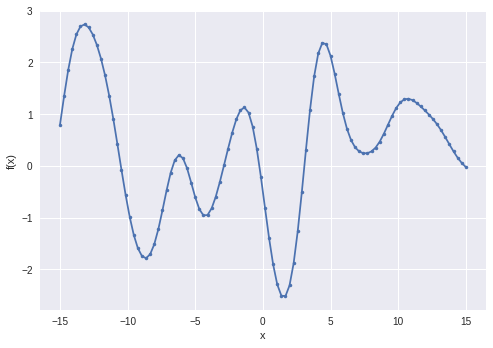

In [0]:
# 入力点セットを作ります
N_sim = 100
x_sim = np.linspace(-15, 15, N_sim)


# 共分散関数（ここでは1次元のガウス関数カーネル）を定義します
# 【実習】 a = 0.2 のところを変化させながら実行して結果を比べてみましょう
# 【実習】 任意のカーネル関数を定義してみましょう
def gaussianKernel( x1, x2 ):
  a = 0.2
  return np.exp( - a * (x1 - x2) * (x1 - x2) )

# グラム行列 （カーネル行列）を計算する関数を定義します
# 入力 k は関数ポインタであることに注意
def computeGram(elements, k):
    n    = len(elements)
    gram = np.zeros([n, n])
    # 対称行列なので、非対角成分は一度だけ計算してコピーする。
    for i in range(n):
        for j in range(i + 1):
            gram[i, j] = k(elements[i], elements[j])

    upTriIdxs       = np.triu_indices(n)
    gram[upTriIdxs] = gram.T[upTriIdxs]

    return gram
  
# グラム行列（カーネル行列）を計算します
K = computeGram( x_sim, gaussianKernel )

# 平均関数はゼロ関数
mu = np.zeros(N_sim)

# 多変量正規分布から N_sim 次元ベクトルをひとつサンプリングします
f = np.random.multivariate_normal(mu,K)

# 折れ線グラフを描画します
plt.plot(x_sim, f, '.-')
plt.xlabel('x')
plt.ylabel('f(x)')
print('')

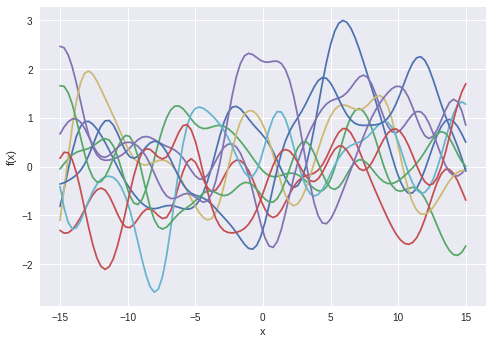

In [0]:
# N_sim 次元ベクトルを 10本　独立にサンプリングして重ねて表示します

fs = np.random.multivariate_normal(mu,K,10)
plt.plot(x_sim,fs.T)
plt.xlabel('x')
plt.ylabel('f(x)')
print('')